In [2]:
import re
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [9]:
df_hacked_accident = pd.read_csv('data_clean/hacked_accident.csv')
df_Accident_type_route = pd.read_csv('data_clean/Accident_type_route.csv')

## Study of hacked notebook

In [43]:
df_hacked_accident

,Unnamed: 0,id,localisation,roadtype,severitycategory,accidentyear,accidenttype,fsocommunecode,accidenttypecode,canton,accidentday,accidentmonth,accidenthour
0,0,A86978B813A700A2E0430A83942700A2,"[2623099.550311569, 1258503.427593987]",route principale,accident avec blessés légers,2011,accident par tamponnement,2829,2.0,BL,jeudi,mars,12h-13h
1,1,9BFF47B1A855800AE0430A865E33800A,"[2554590.8055085572, 1215895.613703452]",route principale,accident avec blessés légers,2011,dérapage ou perte de maîtrise,6421,0.0,NE,mercredi,mars,10h-11h
2,2,9DB7E965368C303AE0430A865E33303A,"[2499604.459144299, 1115174.215736688]",route principale,accident avec blessés légers,2011,accident en quittant une route,6608,3.0,GE,mercredi,mars,12h-13h
3,3,9DE0A637154F10C6E0430A865E3310C6,"[2745562.5989657897, 1254060.5784123347]",route principale,accident avec blessés légers,2011,accident par tamponnement,3203,2.0,SG,mercredi,mars,11h-12h
4,4,9DE0A63723A210C6E0430A865E3310C6,"[2659364.9221492126, 1262665.1019806112]",route principale,accident avec blessés légers,2011,accident en s'engageant sur une route,4121,4.0,AG,mercredi,mars,14h-15h
5,5,9E670458E3713036E0430A865E333036,"[2613983.987651254, 1178740.869521996]",route secondaire,accident avec blessés légers,2011,accident en s'engageant sur une route,942,4.0,BE,mercredi,mars,07h-08h
6,6,9E6719D2FE39D094E0430A865E33D094,"[2621990.468722298, 1233330.2459851135]",route principale,accident avec blessés légers,2011,accident par tamponnement,981,2.0,BE,mercredi,mars,15h-16h
7,7,9EEBB8706AB6F028E0430A865E33F028,"[2617806.969304569, 1170986.751116172]",route principale,accident avec blessés légers,2011,dérapage ou perte de maîtrise,768,0.0,BE,mercredi,mars,15h-16h
8,8,A026416A808C0088E0430A865E330088,"[2595321.065745757, 1197057.0707272522]",route principale,accident avec blessés légers,2011,accident par tamponnement,355,2.0,BE,mercredi,mars,08h-09h
9,9,A03B23164CBF3026E0430A865E333026,"[2664002.798035601, 1213538.9327469745]",route principale,accident avec blessés légers,2011,dérapage ou perte de maîtrise,1024,0.0,LU,mercredi,mars,22h-23h


### 1) Test number of accidents per year

In [11]:
#nb accidents per year
year = df_hacked_accident.accidentyear.unique()
sorted_year = np.sort(year)

print('Year Hack  Official')

for yr in sorted_year:
    nbAccidentsHacked = df_hacked_accident[df_hacked_accident.accidentyear == yr].shape[0]
    nbAccidentsRouteType = sum(df_Accident_type_route.dropna(axis=0)[str(yr)])
    print(yr, nbAccidentsHacked, nbAccidentsRouteType)

Year Hack  Official
2011 19852 18990.0
2012 19928 18148.0
2013 16687 17473.0
2014 17074 17803.0
2015 16484 17736.0
2016 18331 17577.0
2017 17170 17799.0


The variations of hacked data are different from those of official data (from type_route df which are coherent with what SFO publishes online).

### 2) Study type of accidents per month

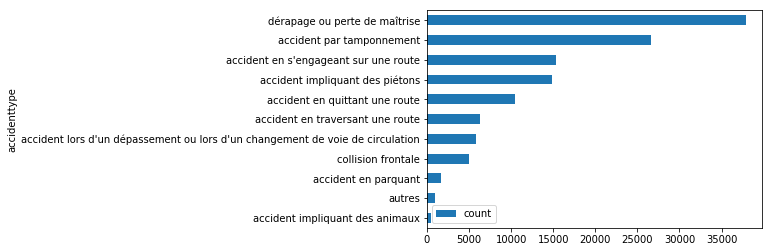

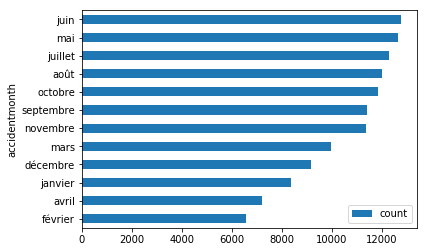

In [12]:
# plot bars of sorted accidents per months and per type
new_df_hack = df_hacked_accident[['accidentmonth', 'accidenttype', 'id']]
count_month_type = new_df_hack.groupby(['accidentmonth', 'accidenttype']).count()
count_month = new_df_hack.groupby(['accidentmonth'])[['id']].count()
count_type = new_df_hack.groupby(['accidenttype'])[['id']].count()

count_type_sort = count_type.sort_values(['id'], ascending=True).rename(columns = {'id' : 'count'})
count_month_sort = count_month.sort_values(['id'], ascending=True).rename(columns = {'id' : 'count'})

count_type_sort.plot(kind='barh')
count_month_sort.plot(kind='barh')

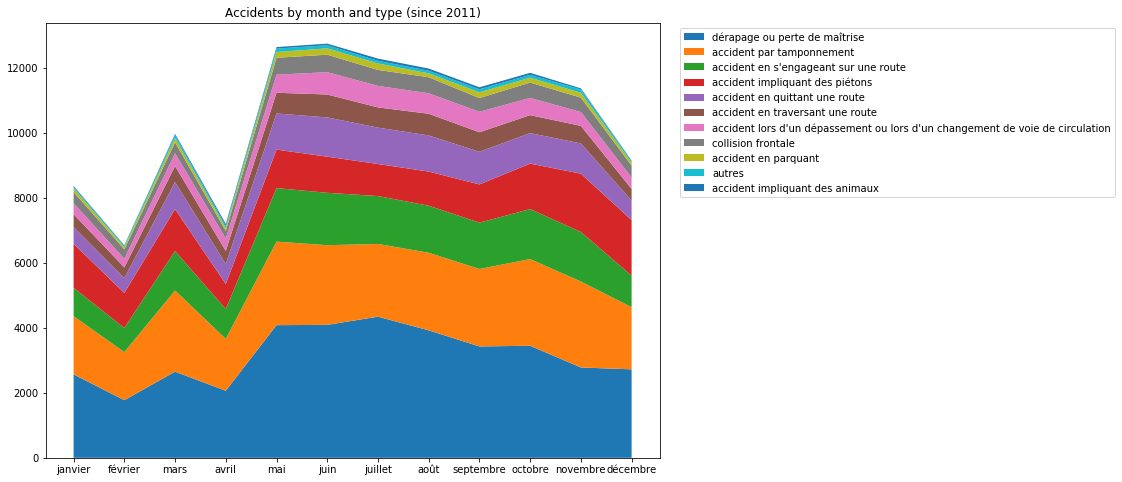

In [13]:
#plot sorted stacks of accidents per month and type
reset_count_df = count_month_type.reset_index()
table_count = reset_count_df.pivot(index='accidentmonth', columns='accidenttype', values='id')
sort_index_table = table_count.reindex(['janvier','février','mars','avril','mai','juin','juillet','août','septembre','octobre','novembre','décembre'])#(count_month_sort.index)
sort_table = sort_index_table.reindex(columns = count_type_sort.index[::-1])

plt.figure(figsize=(11,8))
plt.title('Accidents by month and type (since 2011)')
plt.stackplot(sort_table.index, sort_table.transpose().values)
plt.legend(count_type_sort.index[::-1], bbox_to_anchor=(1.75, 1))
plt.show()

We were supposing that there would be more accidents from 'dérapage' during winter, however it is the opposite. Certainly that in winter, drivers are more cautious, whereas during summer rains, we are more confident, which shouldn't. 

### Study accidents per weekday and cantons


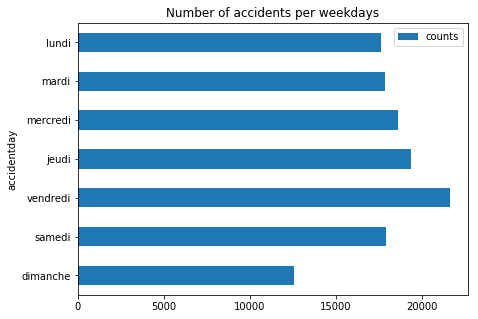

In [14]:
new_df_day = df_hacked_accident[['accidentday', 'canton', 'id']]
accidents_day_count = new_df_day.groupby('accidentday')[['id']].count().reindex(['lundi','mardi','mercredi','jeudi','vendredi','samedi','dimanche'])
accidents_day = accidents_day_count.rename(columns = {'id' : 'counts'})

accidents_day[::-1].plot(kind='barh', figsize=(7,5), title='Number of accidents per weekdays')
plt.show()

In [15]:
count_day_canton = new_df_day.groupby(['accidentday', 'canton']).count()
count_day_canton_reset = count_day_canton.reset_index()
table_day_canton = count_day_canton_reset.pivot(index='canton', columns='accidentday', values='id')
table_day_canton_sort = table_day_canton.reindex(columns = accidents_day.index)
#table_day_canton_sort

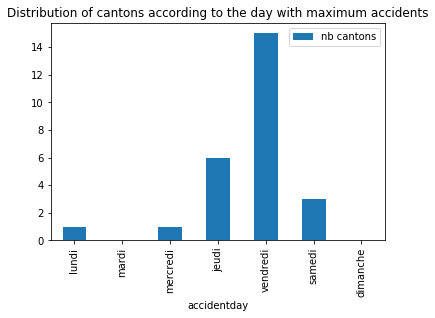

In [16]:
worst_day_canton = table_day_canton_sort.idxmax('columns')
df_worst_day = worst_day_canton.to_frame()
worst_day_reset = df_worst_day.reset_index()
worst_day_reset.columns = ['canton', 'day']
worst_day = worst_day_reset.groupby(['day']).count()

d = {'canton' : pd.Series([0, 0], index=['mardi', 'dimanche'])}
df2 = pd.DataFrame(d)
worst_day_distrib = worst_day.append(df2).reindex(accidents_day.index).rename(columns = {'canton' : 'nb cantons'})
worst_day_distrib.plot(kind='bar', title='Distribution of cantons according to the day with maximum accidents')
plt.show()

### 3) Study accidents per hour per weekday

In [17]:
new_df_hour = df_hacked_accident[['accidentday', 'accidenthour', 'id']]
count_day_hour = new_df_hour.groupby(['accidentday', 'accidenthour']).count()
count_day_hour_reset = count_day_hour.reset_index()
table_day_hour = count_day_hour_reset.pivot(index='accidenthour', columns='accidentday', values='id')
table_day_hour_sort = table_day_hour.reindex(columns = accidents_day.index).dropna(axis=0)
#table_day_hour_sort

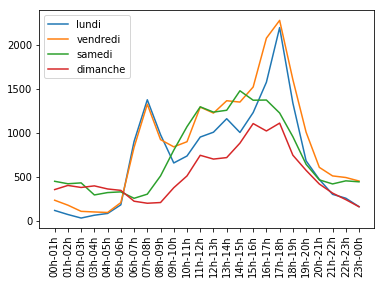

In [18]:
plt.figure()
plt.plot(table_day_hour_sort.index, table_day_hour_sort.lundi)
plt.plot(table_day_hour_sort.index, table_day_hour_sort.vendredi)
plt.plot(table_day_hour_sort.index, table_day_hour_sort.samedi)
plt.plot(table_day_hour_sort.index, table_day_hour_sort.dimanche)
plt.legend(['lundi','vendredi','samedi', 'dimanche'])
plt.xticks(rotation=90)
plt.show()

In [19]:
period = []
for i in range(24):
    if (i<6):
        time='tôt matin'
    elif i<13:
        time='matin'
    elif i<21:
        time='aprem'
    else:
        time='nuit'
    period.append(time)

table_day_hour_sort['period']=period

In [20]:
stack_data = table_day_hour_sort.groupby('period').sum().reindex(['tôt matin','matin','aprem','nuit'])
stack_data_mn = table_day_hour_sort.groupby('period').mean().reindex(['tôt matin','matin','aprem','nuit'])

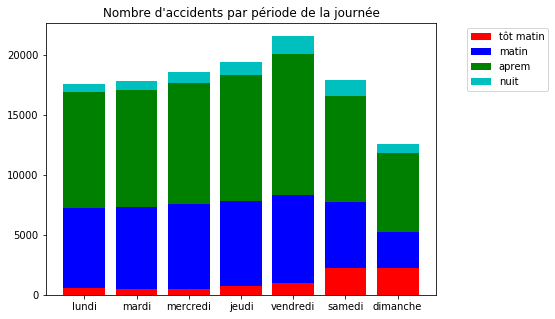

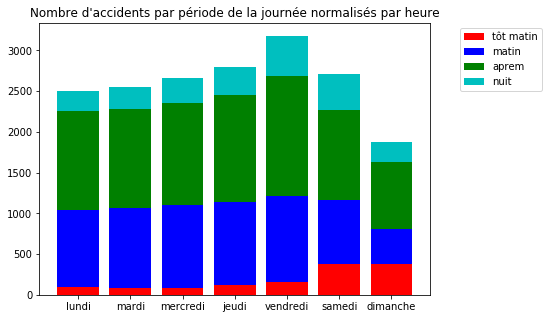

In [21]:
plt.figure(figsize = (7,5))
plt.bar(stack_data.columns, stack_data.iloc[0], color='r')
plt.bar(stack_data.columns, stack_data.iloc[1], bottom=stack_data.iloc[0], color='b')
plt.bar(stack_data.columns, stack_data.iloc[2], bottom=np.array(stack_data.iloc[0])\
                                                 +np.array(stack_data.iloc[1]), color='g')
plt.bar(stack_data.columns, stack_data.iloc[3], bottom=np.array(stack_data.iloc[0])\
                                                 +np.array(stack_data.iloc[1])+np.array(stack_data.iloc[2]), color='c')
plt.legend(['tôt matin','matin','aprem','nuit'], bbox_to_anchor=(1.3, 1))
plt.title("Nombre d'accidents par période de la journée")

plt.figure(figsize = (7,5))
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[0], color='r')
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[1], bottom=stack_data_mn.iloc[0], color='b')
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[2], bottom=np.array(stack_data_mn.iloc[0])\
                                                 +np.array(stack_data_mn.iloc[1]), color='g')
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[3], bottom=np.array(stack_data_mn.iloc[0])\
                                                 +np.array(stack_data_mn.iloc[1])+np.array(stack_data_mn.iloc[2]), color='c')
plt.legend(['tôt matin','matin','aprem','nuit'], bbox_to_anchor=(1.3, 1))
plt.title("Nombre d'accidents par période de la journée normalisés par heure")

plt.show()

Même le vendredi et samedi soir, on compte moins d'accidents par heure que durant les heures de journée.
Il serait tout de même intéressant de plotter uniquement les accidents graves voire mortels, qui eux peuvent être plus nombreux les soirs de week-end.

#### Sub-study of accidents per hour with severe accidents

In [39]:
#même recherche mais sans accidents légers
df_hour_death = df_hacked_accident[(df_hacked_accident['severitycategory'] != 'accident avec blessés légers')]
new_df_hour = df_hour_death[['accidentday', 'accidenthour', 'id']]
count_day_hour = new_df_hour.groupby(['accidentday', 'accidenthour']).count()
count_day_hour_reset = count_day_hour.reset_index()
table_day_hour = count_day_hour_reset.pivot(index='accidenthour', columns='accidentday', values='id')
table_day_hour_sort = table_day_hour.reindex(columns = accidents_day.index).dropna(axis=0)
#table_day_hour_sort

In [40]:
table_day_hour_sort['period']=period
stack_data = table_day_hour_sort.groupby('period').sum().reindex(['tôt matin','matin','aprem','nuit'])
stack_data_mn = table_day_hour_sort.groupby('period').mean().reindex(['tôt matin','matin','aprem','nuit'])

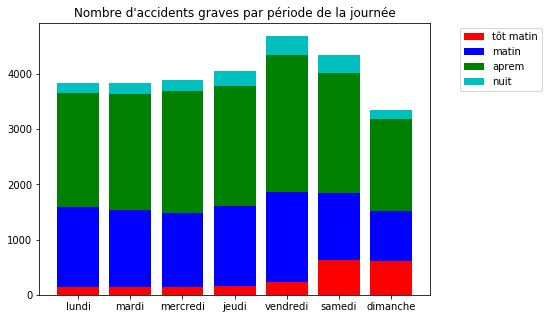

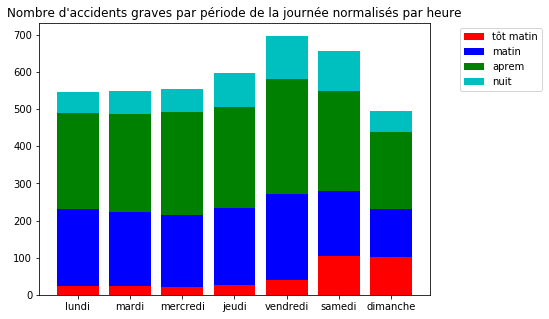

In [42]:
plt.figure(figsize = (7,5))
plt.bar(stack_data.columns, stack_data.iloc[0], color='r')
plt.bar(stack_data.columns, stack_data.iloc[1], bottom=stack_data.iloc[0], color='b')
plt.bar(stack_data.columns, stack_data.iloc[2], bottom=np.array(stack_data.iloc[0])\
                                                 +np.array(stack_data.iloc[1]), color='g')
plt.bar(stack_data.columns, stack_data.iloc[3], bottom=np.array(stack_data.iloc[0])\
                                                 +np.array(stack_data.iloc[1])+np.array(stack_data.iloc[2]), color='c')
plt.legend(['tôt matin','matin','aprem','nuit'], bbox_to_anchor=(1.3, 1))
plt.title("Nombre d'accidents graves par période de la journée")

plt.figure(figsize = (7,5))
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[0], color='r')
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[1], bottom=stack_data_mn.iloc[0], color='b')
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[2], bottom=np.array(stack_data_mn.iloc[0])\
                                                 +np.array(stack_data_mn.iloc[1]), color='g')
plt.bar(stack_data_mn.columns, stack_data_mn.iloc[3], bottom=np.array(stack_data_mn.iloc[0])\
                                                 +np.array(stack_data_mn.iloc[1])+np.array(stack_data_mn.iloc[2]), color='c')
plt.legend(['tôt matin','matin','aprem','nuit'], bbox_to_anchor=(1.3, 1))
plt.title("Nombre d'accidents graves par période de la journée normalisés par heure")

plt.show()

Pour les accidents graves, on remarque une légère augmentation des accidents de nuit le WE relativement aux heures de la journée, mais rien de bien significatif comparé aux accidents globaux.